## Proyecto ML - Diego Barón - 1214719232



# Explorando las colisiones a TeV de LHC usando Machine learning.









**Tabla de contenidos:**
1. Introduccion
2. Marco conceptual
    1. Tensorflow y DNN. 
    2. CMS en el LHC.
    3. Modelo a estudiar.
    4. Base de Datos.
3. Implementacion computacional.
    1. Preparacion de los datos.
    2. ML con NN.
    3. ML con DNN.
4. Resultados y Conclusiones.
5. Bibliografía.


# 1. Introducción.

La física de partículas es la ciencia que estudia los constituyentes fundamentales de la naturaleza y las interacciones que hay entre los mismos, en particular se distinguen dos ramas: la física teórica de particulas (THEP) y la física de particulas experimental (EHEP). Los físicos de partículas experimentales son los encargados de poner a prueba los modelos de sus compañeros los teóricos, esto se traduce en encontrar las nuevas partículas e interacciones propuestas en los modelos y la herramienta más poderosa que se tiene hoy en día para alcanzar este fin son los colisionadores. 

A día de hoy el colisionador que logra las reacciones subatómicas más energéticas es el Gran Colisionador de Hadrones (LHC) (7 TeV por haz), sin embargo, aún cuando estas escalas de energía nos permiten acceder a nueva física (el primer éxito del LHC fue el descubrimiento en 2012 del boson de Higgs [REFERNCIA HIGGS PAPER]), no es para nada sencillo el proceso de descubrimiento de una nueva partícula. El LHC produce grandes cantidades de datos, aproximadamente 1 PB/s, estos deben ser filtrados, por ejemplo: el LHC produce $10^{11}$ colisiones por hora, de las cuales solo 300 involucran a bosones de Higgs. Además los datos deben ser analizados a la luz de las restricciones que provienen de los modelos teóricos, mediante algoritmos de selección, que determinan que eventos provienen de procesos diferentes a los del modelo estándar.

Este parece el panorama ideal para utilizar métodos de machine learning (ML): grandes cantidades de datos y tareas de clasificación. Esta no es una idea nueva y previamente se han implementado métodos de ML, como el de redes neuronales (NN) para realizar estas tareas de clasificación, sin embargo hasta hace unos años existían problemas como el problema del desvanecimiento del gradiente, que no permitían el entrenamiento eficiente de redes neuronales profundas (DNN), en este trabajo pretendendo utilizar algunas de las técnicas más recientes que permiten resolver algunos problemas de entrenamiento de DNN y comparar con trabajos que ya los han utilizado [REFERENCIA PAPER PRINCIPAL]. De hecho como conclusión de estos recientes estudios, se esgrime la idea de que las técnicas de ML son más eficientes que las actuales técnicas usadas en física de partículas.

Para el entrenamiento de las DNN usaremos la libreria TensorFlow [REFERENCIA TENSORFLOW], que fue liberada en 2015 por Google, esta libreria soporta el uso de GPUS y sus operaciones internas se basan en gráficos de flujo.

# 2. Marco conceptual.

# A. Tensorflow y DNN.

Tensorflow es una libreria de código abierto para computación numérica, está especificamente diseñada para aprendizaje automático. Su principio de operación es basico: mediante Python creamos un gráfico de cálculos a realizar y luego Tensorflow interpreta el gráfico y lo corre eficientemente usando rutinas optimizadas de C++.

Es muy importante decir que el gráfico se puede dividir en pequeñas secciones que pueden ser ejecutadas independientemente en varias CPU o GPU, esto permite entrenar redes neuronales muy grandes, con millones de instancias utilizando multiples servidores. Tensorflow fue desarrollado por Google y está detras de proyectos como Google Fotos, Google Busqueda, Google dictado.

Algunas caracteríticas interesantes de Tensorflow son:

* No solo corre en sistemas operativos de computadoras sino también dispositivos móviles como Android y iOs.
* Provee una API que lo hace compatible con Scikit-Learn.
* Contiene funciones muy eficientes implementadas en C++ para su uso en la construcción de redes neuronales.
* Utiliza el método de diferenciación automática para calcular gradientes.
* Posee una interfaz de visualización llamada *Tensor Board* que permite buscar en el gráfico computacional y ver curvas de aprendizaje, entre otras cosas.





# B. CMS en el LHC.

El Gran Colisionador de Hadrones (LHC) es el acelerador de partículas más grande y energético operado actualmente por la Organización Europea para la Investigación Nuclear (CERN), el LHC usa el mismo tunel de 27 km, cavado en promedio a 100 m de profundidad, del antiguo Gran Colisionador Electrón-Positrón (LEP). EL LHC es capaz de colisionar protones e iones de Plomo con una energía por haz de 7 TeV, sin embargo a día de hoy se hace a 6.5 TeV.


En el LHC están ubicados 4 experimentos principales: LHC-b, ALICE, ATLAS y CMS. Estos últimos dos son detectores de proposito general, es decir, fueron diseñados para detectar señales de nueva física en estados finales de partículas como electrones, fotones, muones y jets de hadrones. El LHC esta dividido en dos partes: la cadena de aceleración y el anillo principal. En la cadena de aceleración los protones son extraídos y pasados por una serie de aceleradores que los llevan hasta una energía de 450 GeV, momento en que son inyectados en el anillo principal. Este está compuesto de dos anillos que llevan los protones en direcciones opuestas,los anillos están construidos por 2090 imanes de 15 m, enfriados a 1.9 K y con un vacío de $10^{-9}$mbar, cada uno capaz de producir un campo magnético de 8,33 T. Además de estos imanes dipolares, el LHC también cuenta con 520 cuadrupolos, 2464 sextupolos y 1232 octupolos usados para colimar el haz. [REFERENCIA TESIS JOSE]


El Solenoide Compacto de Muones (CMS) es, en tamaño, el segundo experimento más grande del LHC despues de ATLAS, debe su nombre (solenoide compacto) a que varios de los sistemas de detección se encuentran dentro del su gran imán superconductor, capaz de producir un campo magnético uniforme en su interior de 3.8 T y (de muones) debido a que posee un sistema de detección de muones muy preciso y eficiente. CMS es un detector con forma cilíndrica, mide aproximadamente 30 m de largo por 15 m de diámetro, pesa 14000 Ton (esto lo convierte en el experimento más pesado del LHC) y la colaboración se compone de aproximadamente 3500 personas de 182 institutos de física en 41 países. Una representación tres dimensional del detector se puede ver en la siguiente figura.

 <img src="F2.png",width=800,height=800>

El imán del CMS tiene 13 m de largo y 6 m de diametro, es capaz de generar un campo magnético uniforme de 4 T en su interior y está construido por 4 capas de espiras de NbTi a 4.45K para que se alcance el estado superconductor, este imán está rodeado por 5 barriles y 3 discos de hierro que tienen el objetivo de devolver el campo magnético generando un campo exterior de 2 T,  esta configuración de campos magnéticos es responsable de curvar las trayectorias de las partículas cargadas.


Dentro del solenoide se encuentra el Tracker System, un sistema de detección diseñado con dos tecnologías: Pixeles y tiras de silicio, está diseñado para identificar los vertices de las colisiones con una precisión de 9 $\mu$m y una eficiencia del 98\% (que se degrada con la luminosidad integrada), cuando una partícula cargada pasa se crean pares electrón-hueco en el material y esto genera una señal eléctrica que luego es amplificada, este sistema fue construido para ser bastante resistente a la radiación y se espera que dure 10 años.


Luego de este sistema se encuentra el calorímetro electromagnético (ECAL), este fue construido para detener electrones y fotones y medir su energía, el sistema está compuesto por cristales de tungstato de plomo, el cual fue escogido por su corta profundidad de radiación, alta densidad y rápido centelleo (25 ns), la unica desventaja del mismo es su alta sensibilidad de respuesta a la temperatura (2\%/C). Los cristales van perdiendo transparencia con la luminosidad integrada y por tanto esta tiene que ser corregida constantemente por un sistema de láser. El sistema cuenta con 61200 cristales en el barril y 7324 en las tapas del calorímetro.

Para detener y detectar los jets hadrónicos se diseñó el calorímetro hadrónico (HCAL), de este sistema cierta parte se encuentra dentro del solenoide (Hadron Endcap Calorimeter y Hadron Barrel Calorimeter) y fuera están el Outer Calorimeter y el Hadron Forward Calorimeter (estos permiten extender el rango angular de detección), los calorímetros tienen el objetivo de detectar los hadrones y lo hacen de la siguiente manera: el sistema tiene intercalados placas de acero con cristales centelladores, las placas de acero generan las duchas de hadrones y cuando estos pasan por los centelladores, la luz generada es convertida en corrientes eléctricas por fotodiodos híbridos (HPDs), estas corrientes permiten medir la energía de los hadrones. Es importante mencionar que debido a la posición del Forward Calorimeter, este recibe mucha radiación comparado a los otros calorìmetros hadrónicos y esto es debido a que está en la dirección del haz incidente y por tanto, los centelladores fueron construidos de un material centellador más resistente a la radiación como lo es el cuarzo.

Finalmente en la parte más externa del detector están ubicados los detectores de muones, esto se debe a que estas partículas tienen un gran poder de penetración. Las cámaras de deteccion están hechas de 3 tecnologías diferentes: Drift Tube Chambers (DT), Cathode Strip Chambers(CSC) y Resistive Plate Chambers (RPC), sin embargo las 3 están basadas en la ionización de gases: al paso de partículas cargadas se generan corrientes de deriva. En la figura se muestra una recreación a un corte transversal del detector.

 <img src="F3.png",width=800,height=800>
 
 # C. Modelo a estudiar.
 
 Una pregunta vital que hay que responder es si el bosón de Higgs descubierto en 2012 es el del modelo estándar o hace parte de un sector de bosones escalares como el propuesto por modelos como el modelo minimo estándar supersimétrico (MSSM), ya hay trabajos que han tratado de responder esta pregunta [REFERENCIA A PAPER ATLAS] y en lo que sigue presentaremos el modelo.
 

El modelo se compone básicamente del modelo estandar y un doblete de Higgs adicional que se compone de dos bosones pesados y cargados $H^{\pm}$ y un estado neutral más pesado $H^0$, el bosón ya descubierto se llama $h^{0}$.

El proceso que representa la **señal** es el siguiente: Dos gluones se fusionan en un boson de Higgs $H^0$, que a su vez decae en un bosón de Higgs cargado $H^{\pm}$ y en un W, el $H^{\pm}$ luego decae en otro W y el boson de Higgs ligero $h^{0}$, finalmente este decae en un par de quarks bottom, el proceso entonces es:

$ gg\rightarrow H^0 \rightarrow W^{\mp}H^{\pm}\rightarrow W^{\pm}W^{\mp}h^0\rightarrow W^{\pm}W^{\mp}b\bar{b}$

Para el **background**, es decir el proceso que imita los mismos estados finales, tenemos la producción de dos quarks top , cada uno decayendo en un W y un quark bottom. En la figura se pueden ver los procesos mencionados, arriba la señal y abajo el background.

 <img src="F4.png",width=600,height=600>
 
 En este caso se analiza el modo de decaimiento semi-leptonico: un bosón W decae en un par neutrino-leptón ($l\nu$) y el otro W decae en un par de jets ($jj$), dando unos productos de decaimiento: $l\nu jj bb$. Normalmente se utiliza el método cinemático de la masa invariante para clasificar los eventos, este se basa en el hecho de que si una particula A decae en un par de particulas B y C, se debe cumplir que:
 
$m^{2}_{A}=m^{2}_{B+C}=(E_B+E_C)^2-(\vec{p_B}+\vec{p_C})^2$,

por tanto se espera lo siguiente en este caso:

Para la **señal**:

* $W\rightarrow l\nu$ de un pico en la distribucion $m_{l\nu}$ a la masa del W.

* $W\rightarrow jj$ de un pico en la distribucion $m_{jj}$ a la masa del W.

* $h^0\rightarrow b\bar{b}$ de un pico en la distribucion $m_{b\bar{b}}$ a la masa del $h^0$.

* $H^\pm\rightarrow Wh^0$ de un pico en la distribucion $m_{b\bar{b}}$ a la masa del $H^\pm$.

* $H^0\rightarrow WH^\pm$ de un pico en la distribucion $m_{WWb\bar{b}}$ a la masa del $H^0$.


Para el **background**:


* $W\rightarrow l\nu$ de un pico en la distribucion $m_{l\nu}$ a la masa del W.

* $W\rightarrow jj$ de un pico en la distribucion $m_{jj}$ a la masa del W.

* $t\rightarrow Wb$ de un pico en la distribucion $m_{jl\nu}$ y $m_{jbb}$ a la masa del quark top.

# D. Base de datos.

En el lenguaje de ML tenemos que los datos se componen de 11 MILLONES de instancias (eventos) cada uno con 29 atributos, el archivo csv es de aproximadamente 8 GB, estos datos han sido generados utilizando simulaciones de MonteCarlo utilizando el generador de eventos MADGRAPH5 asumiendo una energía de colisión en el centro de masa de 8 TeV, el proceso de hadronización ha sido simulado con el software PYTHIA y la respuesta del detector con DELPHES, en este caso $m_{H^0}=425$ GeV y $m_{H^0}=325$ GeV. 

La primera columna de los datos es la etiqueta: 1 para la señal y 0 para el background. Los siguientes 21 datos atributos de bajo nivel (medidos directamente por el detector) y los 7 restantes atributos de alto nivel (funciones de los atributos de bajo nivel).

Para este trabajo sin embargo hemos utilizado solo el 1% de los datos (100.000 eventos), por cuestiones de capacidad de cómputo.

# 3. Implementación computacional.

   # A. Preparación de los datos.
   
Debido a que el fichero original pesa aproximadament 8 GB y contiene 11 millones de instancias, vamos a usar una versión reducida del mismo, que contiene 100000 instancias, esto con el objetivo de que el entrenamiento sea mucho más rápido ya que no contamos con los recursos computacionales suficientes para procesar los datos originales.
   
   

In [1]:
# IMPORTAMOS LAS LIBRERIAS COMUNMENTE UTILIZADAS Y FIJAMOS LOS PARÁMETROS INICIALES

%pylab inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

np.random.seed(42)


# CARGAMOS LOS DATOS 

dataO= pd.read_csv("Datos_Reducidos.csv")

# ELIMINA PRIMERA COLUMNA INNECESARIA

del dataO['Unnamed: 0']

# CREANDO LISTA PARA CAMBIAR LOS NOMBRES DE CADA COLUMNA EL LOS DATOS
labels=["Evento"]
for i in range(1,29):
    if i<22:
        labels+=["LL"+str(i)]
    else :
        labels+=["HL"+str(i-21)]
        
# CAMBIO NOMBRE DE COLUMNAS EN dataO

dataO.columns=labels

# OBTENIENDO UNA DESCRIPCIÓN DE LA DATA 

dataO.describe()

Populating the interactive namespace from numpy and matplotlib


,Evento,LL1,LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9,...,LL19,LL20,LL21,HL1,HL2,HL3,HL4,HL5,HL6,HL7
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.528330,0.990366,-0.003806,-0.001636,0.995061,-0.007612,0.987112,-0.003017,0.000441,0.998344,...,-0.007598,-0.004017,0.992690,1.032607,1.023150,1.050193,1.010197,0.973076,1.031874,0.959203
std,0.499199,0.561840,1.004840,1.006190,0.595359,1.006996,0.473120,1.008705,1.008427,1.027402,...,1.009200,1.007096,1.396776,0.652454,0.371611,0.164857,0.398275,0.523557,0.363395,0.313258
min,0.000000,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.110875,0.303144,0.133012,0.295983,0.048125,0.303350,0.350939
25%,0.000000,0.590936,-0.741244,-0.868047,0.575656,-0.881465,0.676336,-0.688483,-0.867542,0.000000,...,-0.725017,-0.877028,0.000000,0.791306,0.846627,0.985775,0.767261,0.673789,0.819170,0.769964
50%,1.000000,0.854835,-0.002976,0.000971,0.890283,-0.011024,0.892163,-0.000025,-0.003822,1.086538,...,-0.010455,-0.009698,0.000000,0.895600,0.950707,0.989742,0.917302,0.874004,0.947037,0.871038
75%,1.000000,1.236776,0.735292,0.868220,1.290881,0.865868,1.167809,0.683233,0.871223,2.173076,...,0.710770,0.869386,3.101961,1.025914,1.083218,1.020762,1.141654,1.139816,1.139032,1.057479
max,1.000000,7.805887,2.433894,1.743236,7.998711,1.743229,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.428827,10.038273,4.565248,7.442589,11.994177,7.318191,6.015647


In [2]:
# MUESTRA UN EJEMPLO DE COMO LUCEN LOS DATOS
dataO.head()

,Evento,LL1,LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9,...,LL19,LL20,LL21,HL1,HL2,HL3,HL4,HL5,HL6,HL7
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [3]:
# SEPARAMOS INSTACIAS Y ETIQUETAS 

Y=dataO["Evento"]
X_L_H= dataO.iloc[:,1:]

In [4]:
# SEPARAMOS LAS INSTANCIAS EN INSTANCIAS CON ATRIBUTOS DE ALTO NIVEL Y INSTANCIAS CON ATRIBUTOS DE BAJO NIVEL

X_H=X_L_H.iloc[:,21:]
X_L=X_L_H.iloc[:,:21]

In [5]:
# SEPARAMOS ESTOS DATOS EN UN CONJUNTO DE ENTRENAMIENTO DE 80.000 INSTANCIAS Y 20.000 PARA PRUEBA

Y_train=Y.iloc[:80000]
Y_test=Y.iloc[80000:]
X_L_H_train=X_L_H.iloc[:80000,:]
X_L_H_test=X_L_H.iloc[80000:,:]
X_L_train=X_L.iloc[:80000,:]
X_L_test=X_L.iloc[80000:,:]
X_H_train=X_H.iloc[:80000,:]
X_H_test=X_H.iloc[80000:,:]


# B. ML con NN.

Para empezar vamos a entrenar 3 modelos utilizando redes neuronales superficiales (NN), los modelos son:

* Clasificador Señal vs Background (S vs B) utilizando atributos de alto y bajo nivel (HLF y LLF).
* Clasificador S vs B utilizando LLF.
* Clasificador S vs B utilizando HLF.

**Clasificador S vs B utilizando HLF.**

In [6]:
import tensorflow as tf

In [67]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[90], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_H_train, Y_train, batch_size=50, steps=40000)


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f01ad14b450>, '_model_dir': '/tmp/tmpON2_OM', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpON2_OM/model.ckpt.
INFO:tensorflow:loss = 0.697496, step = 1
INFO:tensorflow:global_step/sec: 559.384
INFO:tensorflow:loss = 0.740561, step = 101 (0.179 sec)
INFO:tensorflow:global_step/sec: 571.083
INFO:tensorflow:loss = 0.671686, step = 201 (0.175 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 594.608
INFO:tensorflow:loss = 0.628176, step = 7201 (0.168 sec)
INFO:tensorflow:global_step/sec: 601.215
INFO:tensorflow:loss = 0.571144, step = 7301 (0.166 sec)
INFO:tensorflow:global_step/sec: 607.341
INFO:tensorflow:loss = 0.564062, step = 7401 (0.165 sec)
INFO:tensorflow:global_step/sec: 605.859
INFO:tensorflow:loss = 0.546935, step = 7501 (0.164 sec)
INFO:tensorflow:global_step/sec: 614.561
INFO:tensorflow:loss = 0.565085, step = 7601 (0.163 sec)
INFO:tensorflow:global_step/sec: 610.918
INFO:tensorflow:loss = 0.536699, step = 7701 (0.164 sec)
INFO:tensorflow:global_step/sec: 613.798
INFO:tensorflow:loss = 0.599465, step = 7801 (0.163 sec)
INFO:tensorflow:global_step/sec: 611.325
INFO:tensorflow:loss = 0.615473, step = 7901 (0.164 sec)
INFO:tensorflow:global_step/sec: 596.645
INFO:tensorflow:loss = 0.593744, step = 8001 (0.168 sec)
INFO:tensorflow:global_step/sec: 595.206
INFO:tensorflow:loss = 0.601545, step = 8101 (0.167 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 0.561127, step = 15501 (0.189 sec)
INFO:tensorflow:global_step/sec: 535.314
INFO:tensorflow:loss = 0.56316, step = 15601 (0.187 sec)
INFO:tensorflow:global_step/sec: 603.967
INFO:tensorflow:loss = 0.661953, step = 15701 (0.166 sec)
INFO:tensorflow:global_step/sec: 609.165
INFO:tensorflow:loss = 0.567297, step = 15801 (0.164 sec)
INFO:tensorflow:global_step/sec: 580.717
INFO:tensorflow:loss = 0.59659, step = 15901 (0.172 sec)
INFO:tensorflow:global_step/sec: 592.424
INFO:tensorflow:loss = 0.652898, step = 16001 (0.169 sec)
INFO:tensorflow:global_step/sec: 607.43
INFO:tensorflow:loss = 0.521121, step = 16101 (0.165 sec)
INFO:tensorflow:global_step/sec: 599.905
INFO:tensorflow:loss = 0.575219, step = 16201 (0.167 sec)
INFO:tensorflow:global_step/sec: 596.791
INFO:tensorflow:loss = 0.587514, step = 16301 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.999
INFO:tensorflow:loss = 0.588442, step = 16401 (0.170 sec)
INFO:tensorflow:global_step/sec: 599.323
INFO:tensorfl

INFO:tensorflow:loss = 0.592462, step = 23801 (0.168 sec)
INFO:tensorflow:global_step/sec: 596.954
INFO:tensorflow:loss = 0.589892, step = 23901 (0.167 sec)
INFO:tensorflow:global_step/sec: 591.08
INFO:tensorflow:loss = 0.634659, step = 24001 (0.169 sec)
INFO:tensorflow:global_step/sec: 491.55
INFO:tensorflow:loss = 0.630795, step = 24101 (0.204 sec)
INFO:tensorflow:global_step/sec: 596.983
INFO:tensorflow:loss = 0.515337, step = 24201 (0.167 sec)
INFO:tensorflow:global_step/sec: 524.307
INFO:tensorflow:loss = 0.616936, step = 24301 (0.191 sec)
INFO:tensorflow:global_step/sec: 555.565
INFO:tensorflow:loss = 0.596009, step = 24401 (0.180 sec)
INFO:tensorflow:global_step/sec: 597.828
INFO:tensorflow:loss = 0.584616, step = 24501 (0.168 sec)
INFO:tensorflow:global_step/sec: 504.724
INFO:tensorflow:loss = 0.579685, step = 24601 (0.198 sec)
INFO:tensorflow:global_step/sec: 564.86
INFO:tensorflow:loss = 0.634386, step = 24701 (0.177 sec)
INFO:tensorflow:global_step/sec: 586.934
INFO:tensorfl

INFO:tensorflow:loss = 0.731033, step = 32101 (0.170 sec)
INFO:tensorflow:global_step/sec: 593.12
INFO:tensorflow:loss = 0.630577, step = 32201 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.987
INFO:tensorflow:loss = 0.674809, step = 32301 (0.167 sec)
INFO:tensorflow:global_step/sec: 572.514
INFO:tensorflow:loss = 0.631281, step = 32401 (0.175 sec)
INFO:tensorflow:global_step/sec: 599.075
INFO:tensorflow:loss = 0.616198, step = 32501 (0.168 sec)
INFO:tensorflow:global_step/sec: 587.852
INFO:tensorflow:loss = 0.506236, step = 32601 (0.169 sec)
INFO:tensorflow:global_step/sec: 599.405
INFO:tensorflow:loss = 0.523413, step = 32701 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.04
INFO:tensorflow:loss = 0.563797, step = 32801 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.261
INFO:tensorflow:loss = 0.636098, step = 32901 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.433
INFO:tensorflow:loss = 0.533103, step = 33001 (0.168 sec)
INFO:tensorflow:global_step/sec: 590.343
INFO:tensorf

SKCompat()

In [68]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

# PUNTUACION DE PRECISION

from sklearn.metrics import accuracy_score

Y_pred_H = dnn_clf.predict(X_H_test)
accuracy_score(Y_test, Y_pred_H['classes'])



INFO:tensorflow:Restoring parameters from /tmp/tmpON2_OM/model.ckpt-40000


0.68579999999999997

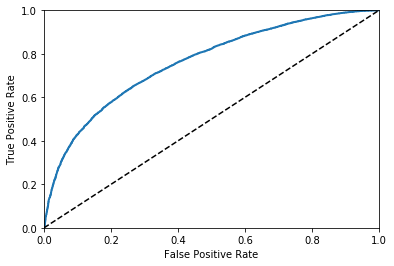

In [69]:
#GRAFICANDO LA CURVA ROC

Y_H_scores= Y_pred_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [70]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_H['classes'])

0.6835103831304491

In [71]:
# CONTANDO SEÑAL 
senal=0
bkg=0
for i in Y_pred_H["classes"]:
    if i==1:
        senal=senal+1
    else: 
        bkg=bkg+1
print (senal,bkg)


(11328, 8672)


**Clasificador S vs B utilizando LLF.**

In [72]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[90], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f01af22a310>, '_model_dir': '/tmp/tmpH721GT', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpH721GT/model.ckpt.
INFO:tensorflow:loss = 0.811923, step = 1
INFO:tensorflow:global_step/sec: 504.187
INFO:tensorflow:loss = 0.711112, step = 101 (0.199 sec)
INFO:tensorflow:global_step/sec: 579.589
INFO:tensorflow:loss = 0.672332, step = 201 (0.173 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 460.815
INFO:tensorflow:loss = 0.664484, step = 7201 (0.216 sec)
INFO:tensorflow:global_step/sec: 569.142
INFO:tensorflow:loss = 0.594878, step = 7301 (0.176 sec)
INFO:tensorflow:global_step/sec: 556.973
INFO:tensorflow:loss = 0.689614, step = 7401 (0.180 sec)
INFO:tensorflow:global_step/sec: 473.671
INFO:tensorflow:loss = 0.63072, step = 7501 (0.211 sec)
INFO:tensorflow:global_step/sec: 551.676
INFO:tensorflow:loss = 0.640527, step = 7601 (0.181 sec)
INFO:tensorflow:global_step/sec: 560.007
INFO:tensorflow:loss = 0.606513, step = 7701 (0.179 sec)
INFO:tensorflow:global_step/sec: 536.884
INFO:tensorflow:loss = 0.631213, step = 7801 (0.186 sec)
INFO:tensorflow:global_step/sec: 457.214
INFO:tensorflow:loss = 0.584243, step = 7901 (0.219 sec)
INFO:tensorflow:global_step/sec: 574.517
INFO:tensorflow:loss = 0.728653, step = 8001 (0.174 sec)
INFO:tensorflow:global_step/sec: 498.132
INFO:tensorflow:loss = 0.705631, step = 8101 (0.202 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 0.628034, step = 15501 (0.166 sec)
INFO:tensorflow:global_step/sec: 604.138
INFO:tensorflow:loss = 0.685185, step = 15601 (0.166 sec)
INFO:tensorflow:global_step/sec: 602.305
INFO:tensorflow:loss = 0.651153, step = 15701 (0.166 sec)
INFO:tensorflow:global_step/sec: 599.707
INFO:tensorflow:loss = 0.658768, step = 15801 (0.167 sec)
INFO:tensorflow:global_step/sec: 603.836
INFO:tensorflow:loss = 0.572636, step = 15901 (0.166 sec)
INFO:tensorflow:global_step/sec: 595.883
INFO:tensorflow:loss = 0.674464, step = 16001 (0.168 sec)
INFO:tensorflow:global_step/sec: 597.439
INFO:tensorflow:loss = 0.686915, step = 16101 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.577
INFO:tensorflow:loss = 0.632753, step = 16201 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.977
INFO:tensorflow:loss = 0.654419, step = 16301 (0.167 sec)
INFO:tensorflow:global_step/sec: 600.85
INFO:tensorflow:loss = 0.634917, step = 16401 (0.167 sec)
INFO:tensorflow:global_step/sec: 603.198
INFO:tensor

INFO:tensorflow:loss = 0.665936, step = 23801 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.851
INFO:tensorflow:loss = 0.661002, step = 23901 (0.167 sec)
INFO:tensorflow:global_step/sec: 591.828
INFO:tensorflow:loss = 0.661968, step = 24001 (0.169 sec)
INFO:tensorflow:global_step/sec: 495.213
INFO:tensorflow:loss = 0.657754, step = 24101 (0.206 sec)
INFO:tensorflow:global_step/sec: 579.183
INFO:tensorflow:loss = 0.613454, step = 24201 (0.169 sec)
INFO:tensorflow:global_step/sec: 602.377
INFO:tensorflow:loss = 0.625764, step = 24301 (0.166 sec)
INFO:tensorflow:global_step/sec: 597.665
INFO:tensorflow:loss = 0.627181, step = 24401 (0.167 sec)
INFO:tensorflow:global_step/sec: 600.564
INFO:tensorflow:loss = 0.652158, step = 24501 (0.166 sec)
INFO:tensorflow:global_step/sec: 522.911
INFO:tensorflow:loss = 0.603119, step = 24601 (0.192 sec)
INFO:tensorflow:global_step/sec: 599.007
INFO:tensorflow:loss = 0.600946, step = 24701 (0.167 sec)
INFO:tensorflow:global_step/sec: 600.006
INFO:tenso

INFO:tensorflow:loss = 0.720028, step = 32101 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.889
INFO:tensorflow:loss = 0.624719, step = 32201 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.255
INFO:tensorflow:loss = 0.583771, step = 32301 (0.167 sec)
INFO:tensorflow:global_step/sec: 601.399
INFO:tensorflow:loss = 0.653053, step = 32401 (0.166 sec)
INFO:tensorflow:global_step/sec: 597.857
INFO:tensorflow:loss = 0.602588, step = 32501 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.864
INFO:tensorflow:loss = 0.614494, step = 32601 (0.167 sec)
INFO:tensorflow:global_step/sec: 601.521
INFO:tensorflow:loss = 0.609861, step = 32701 (0.166 sec)
INFO:tensorflow:global_step/sec: 600.759
INFO:tensorflow:loss = 0.652865, step = 32801 (0.167 sec)
INFO:tensorflow:global_step/sec: 597.611
INFO:tensorflow:loss = 0.600361, step = 32901 (0.167 sec)
INFO:tensorflow:global_step/sec: 601.186
INFO:tensorflow:loss = 0.6133, step = 33001 (0.167 sec)
INFO:tensorflow:global_step/sec: 601.308
INFO:tensorf

SKCompat()

In [73]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L = dnn_clf.predict(X_L_test)


accuracy_score(Y_test, Y_pred_L['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpH721GT/model.ckpt-40000


0.62529999999999997

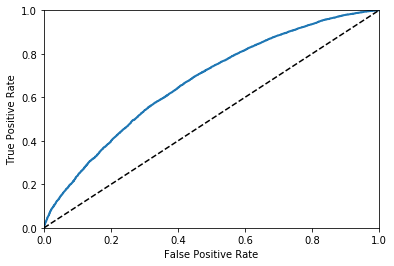

In [74]:
#GRAFICANDO LA CURVA ROC

Y_L_scores= Y_pred_L["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_L_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [75]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L['classes'])

0.62192660576552639

**Clasificador S vs B utilizando LLF+HLF.**

In [77]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF+HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[90], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_H_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0176d63f50>, '_model_dir': '/tmp/tmp_9sh1M', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp_9sh1M/model.ckpt.
INFO:tensorflow:loss = 0.803145, step = 1
INFO:tensorflow:global_step/sec: 528.053
INFO:tensorflow:loss = 0.72538, step = 101 (0.190 sec)
INFO:tensorflow:global_step/sec: 569.074
INFO:tensorflow:loss = 0.643046, step = 201 (0.176 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.616336, step = 7201 (0.207 sec)
INFO:tensorflow:global_step/sec: 486.284
INFO:tensorflow:loss = 0.568697, step = 7301 (0.205 sec)
INFO:tensorflow:global_step/sec: 609.556
INFO:tensorflow:loss = 0.612826, step = 7401 (0.164 sec)
INFO:tensorflow:global_step/sec: 583.278
INFO:tensorflow:loss = 0.591826, step = 7501 (0.172 sec)
INFO:tensorflow:global_step/sec: 435.563
INFO:tensorflow:loss = 0.589159, step = 7601 (0.230 sec)
INFO:tensorflow:global_step/sec: 584
INFO:tensorflow:loss = 0.544282, step = 7701 (0.170 sec)
INFO:tensorflow:global_step/sec: 607.61
INFO:tensorflow:loss = 0.608186, step = 7801 (0.165 sec)
INFO:tensorflow:global_step/sec: 606.914
INFO:tensorflow:loss = 0.537585, step = 7901 (0.165 sec)
INFO:tensorflow:global_step/sec: 602.94
INFO:tensorflow:loss = 0.646638, step = 8001 (0.166 sec)
INFO:tensorflow:global_step/sec: 600.291
INFO:tensorflow:loss = 0.702188, step = 8101 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.508
INFO:tensorflow:loss = 0.6

INFO:tensorflow:global_step/sec: 616.477
INFO:tensorflow:loss = 0.632262, step = 15601 (0.162 sec)
INFO:tensorflow:global_step/sec: 616.809
INFO:tensorflow:loss = 0.634005, step = 15701 (0.162 sec)
INFO:tensorflow:global_step/sec: 615.634
INFO:tensorflow:loss = 0.586113, step = 15801 (0.163 sec)
INFO:tensorflow:global_step/sec: 609.924
INFO:tensorflow:loss = 0.548932, step = 15901 (0.163 sec)
INFO:tensorflow:global_step/sec: 611.213
INFO:tensorflow:loss = 0.621239, step = 16001 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.429
INFO:tensorflow:loss = 0.554924, step = 16101 (0.164 sec)
INFO:tensorflow:global_step/sec: 612.532
INFO:tensorflow:loss = 0.537999, step = 16201 (0.163 sec)
INFO:tensorflow:global_step/sec: 615.407
INFO:tensorflow:loss = 0.599351, step = 16301 (0.163 sec)
INFO:tensorflow:global_step/sec: 616.557
INFO:tensorflow:loss = 0.540491, step = 16401 (0.162 sec)
INFO:tensorflow:global_step/sec: 613.35
INFO:tensorflow:loss = 0.66242, step = 16501 (0.163 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 602.316
INFO:tensorflow:loss = 0.589609, step = 23901 (0.167 sec)
INFO:tensorflow:global_step/sec: 601.428
INFO:tensorflow:loss = 0.627292, step = 24001 (0.166 sec)
INFO:tensorflow:global_step/sec: 579.801
INFO:tensorflow:loss = 0.621794, step = 24101 (0.172 sec)
INFO:tensorflow:global_step/sec: 601.532
INFO:tensorflow:loss = 0.554007, step = 24201 (0.166 sec)
INFO:tensorflow:global_step/sec: 606.27
INFO:tensorflow:loss = 0.595548, step = 24301 (0.165 sec)
INFO:tensorflow:global_step/sec: 594.738
INFO:tensorflow:loss = 0.567901, step = 24401 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.253
INFO:tensorflow:loss = 0.580893, step = 24501 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.33
INFO:tensorflow:loss = 0.58845, step = 24601 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.384
INFO:tensorflow:loss = 0.607353, step = 24701 (0.166 sec)
INFO:tensorflow:global_step/sec: 608.08
INFO:tensorflow:loss = 0.513202, step = 24801 (0.164 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 558.014
INFO:tensorflow:loss = 0.589471, step = 32201 (0.179 sec)
INFO:tensorflow:global_step/sec: 520.549
INFO:tensorflow:loss = 0.61724, step = 32301 (0.191 sec)
INFO:tensorflow:global_step/sec: 581.855
INFO:tensorflow:loss = 0.560976, step = 32401 (0.172 sec)
INFO:tensorflow:global_step/sec: 613.448
INFO:tensorflow:loss = 0.512333, step = 32501 (0.163 sec)
INFO:tensorflow:global_step/sec: 610.407
INFO:tensorflow:loss = 0.55706, step = 32601 (0.165 sec)
INFO:tensorflow:global_step/sec: 607.958
INFO:tensorflow:loss = 0.531123, step = 32701 (0.164 sec)
INFO:tensorflow:global_step/sec: 605.1
INFO:tensorflow:loss = 0.519411, step = 32801 (0.165 sec)
INFO:tensorflow:global_step/sec: 601.794
INFO:tensorflow:loss = 0.601755, step = 32901 (0.166 sec)
INFO:tensorflow:global_step/sec: 601.634
INFO:tensorflow:loss = 0.498546, step = 33001 (0.166 sec)
INFO:tensorflow:global_step/sec: 601.778
INFO:tensorflow:loss = 0.619272, step = 33101 (0.167 sec)
INFO:tensorflo

SKCompat()

In [78]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L_H = dnn_clf.predict(X_L_H_test)
accuracy_score(Y_test, Y_pred_L_H['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmp_9sh1M/model.ckpt-40000


0.68654999999999999

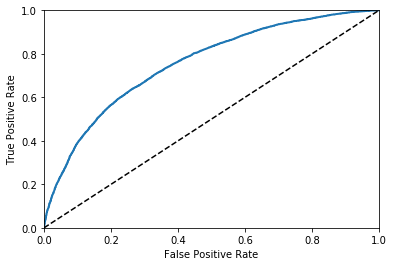

In [79]:
#GRAFICANDO LA CURVA ROC

Y_L_H_scores= Y_pred_L_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_L_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [80]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L_H['classes'])

0.68391551676335671

# ML con DNN.

** DNN con HLF.**

In [81]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[90,90], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_H_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0175614890>, '_model_dir': '/tmp/tmpJlSjCg', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpJlSjCg/model.ckpt.
INFO:tensorflow:loss = 0.69689, step = 1
INFO:tensorflow:global_step/sec: 521.237
INFO:tensorflow:loss = 0.733712, step = 101 (0.194 sec)
INFO:tensorflow:global_step/sec: 537.585
INFO:tensorflow:loss = 0.665016, step = 201 (0.185 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.572957, step = 7201 (0.187 sec)
INFO:tensorflow:global_step/sec: 512.85
INFO:tensorflow:loss = 0.544077, step = 7301 (0.199 sec)
INFO:tensorflow:global_step/sec: 520.164
INFO:tensorflow:loss = 0.545514, step = 7401 (0.190 sec)
INFO:tensorflow:global_step/sec: 560.419
INFO:tensorflow:loss = 0.535888, step = 7501 (0.177 sec)
INFO:tensorflow:global_step/sec: 565.02
INFO:tensorflow:loss = 0.540682, step = 7601 (0.177 sec)
INFO:tensorflow:global_step/sec: 571.37
INFO:tensorflow:loss = 0.500366, step = 7701 (0.175 sec)
INFO:tensorflow:global_step/sec: 568.761
INFO:tensorflow:loss = 0.564597, step = 7801 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.594
INFO:tensorflow:loss = 0.574805, step = 7901 (0.176 sec)
INFO:tensorflow:global_step/sec: 567.057
INFO:tensorflow:loss = 0.567475, step = 8001 (0.176 sec)
INFO:tensorflow:global_step/sec: 568.583
INFO:tensorflow:loss = 0.580172, step = 8101 (0.176 sec)
INFO:tensorflow:global_step/sec: 567.953
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 569.272
INFO:tensorflow:loss = 0.580062, step = 15601 (0.176 sec)
INFO:tensorflow:global_step/sec: 568.34
INFO:tensorflow:loss = 0.625703, step = 15701 (0.176 sec)
INFO:tensorflow:global_step/sec: 574.075
INFO:tensorflow:loss = 0.551893, step = 15801 (0.174 sec)
INFO:tensorflow:global_step/sec: 571.771
INFO:tensorflow:loss = 0.575347, step = 15901 (0.175 sec)
INFO:tensorflow:global_step/sec: 567.068
INFO:tensorflow:loss = 0.601965, step = 16001 (0.176 sec)
INFO:tensorflow:global_step/sec: 567.84
INFO:tensorflow:loss = 0.555021, step = 16101 (0.177 sec)
INFO:tensorflow:global_step/sec: 564.411
INFO:tensorflow:loss = 0.542132, step = 16201 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.675
INFO:tensorflow:loss = 0.58759, step = 16301 (0.175 sec)
INFO:tensorflow:global_step/sec: 568.412
INFO:tensorflow:loss = 0.611045, step = 16401 (0.176 sec)
INFO:tensorflow:global_step/sec: 571.265
INFO:tensorflow:loss = 0.611066, step = 16501 (0.176 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.544201, step = 23901 (0.176 sec)
INFO:tensorflow:global_step/sec: 544.307
INFO:tensorflow:loss = 0.631214, step = 24001 (0.184 sec)
INFO:tensorflow:global_step/sec: 369.137
INFO:tensorflow:loss = 0.596344, step = 24101 (0.275 sec)
INFO:tensorflow:global_step/sec: 428.877
INFO:tensorflow:loss = 0.474298, step = 24201 (0.234 sec)
INFO:tensorflow:global_step/sec: 473.348
INFO:tensorflow:loss = 0.645834, step = 24301 (0.207 sec)
INFO:tensorflow:global_step/sec: 392.329
INFO:tensorflow:loss = 0.598349, step = 24401 (0.255 sec)
INFO:tensorflow:global_step/sec: 566.396
INFO:tensorflow:loss = 0.544805, step = 24501 (0.177 sec)
INFO:tensorflow:global_step/sec: 566.197
INFO:tensorflow:loss = 0.587297, step = 24601 (0.176 sec)
INFO:tensorflow:global_step/sec: 490.525
INFO:tensorflow:loss = 0.642162, step = 24701 (0.205 sec)
INFO:tensorflow:global_step/sec: 435.197
INFO:tensorflow:loss = 0.581096, step = 24801 (0.229 sec)
INFO:tensorflow:global_step/sec: 567.43
INFO:tensor

INFO:tensorflow:loss = 0.617874, step = 32201 (0.294 sec)
INFO:tensorflow:global_step/sec: 494.954
INFO:tensorflow:loss = 0.656516, step = 32301 (0.199 sec)
INFO:tensorflow:global_step/sec: 568.929
INFO:tensorflow:loss = 0.644706, step = 32401 (0.176 sec)
INFO:tensorflow:global_step/sec: 568.731
INFO:tensorflow:loss = 0.645559, step = 32501 (0.177 sec)
INFO:tensorflow:global_step/sec: 566.447
INFO:tensorflow:loss = 0.487903, step = 32601 (0.176 sec)
INFO:tensorflow:global_step/sec: 367.8
INFO:tensorflow:loss = 0.505316, step = 32701 (0.274 sec)
INFO:tensorflow:global_step/sec: 505.321
INFO:tensorflow:loss = 0.573479, step = 32801 (0.196 sec)
INFO:tensorflow:global_step/sec: 570.936
INFO:tensorflow:loss = 0.670896, step = 32901 (0.175 sec)
INFO:tensorflow:global_step/sec: 573.842
INFO:tensorflow:loss = 0.548221, step = 33001 (0.174 sec)
INFO:tensorflow:global_step/sec: 571.755
INFO:tensorflow:loss = 0.592451, step = 33101 (0.175 sec)
INFO:tensorflow:global_step/sec: 568.608
INFO:tensorf

SKCompat()

In [82]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

# PUNTUACION DE PRECISION

from sklearn.metrics import accuracy_score

Y_pred_H = dnn_clf.predict(X_H_test)
accuracy_score(Y_test, Y_pred_H['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpJlSjCg/model.ckpt-40000


0.69694999999999996

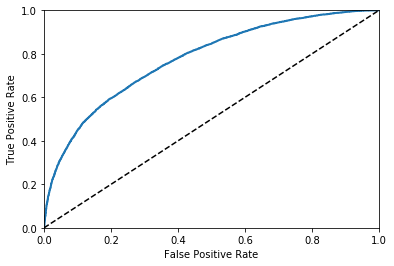

In [83]:
#GRAFICANDO LA CURVA ROC

Y_H_scores= Y_pred_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [85]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_H['classes'])

0.69575750084596055

** Clasificador DNN con LLF.**

In [86]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[90,90], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0174448950>, '_model_dir': '/tmp/tmp9hsFkj', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9hsFkj/model.ckpt.
INFO:tensorflow:loss = 0.703839, step = 1
INFO:tensorflow:global_step/sec: 448.278
INFO:tensorflow:loss = 0.720716, step = 101 (0.223 sec)
INFO:tensorflow:global_step/sec: 526.232
INFO:tensorflow:loss = 0.66512, step = 201 (0.190 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.628365, step = 7201 (0.181 sec)
INFO:tensorflow:global_step/sec: 546.567
INFO:tensorflow:loss = 0.583043, step = 7301 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.879
INFO:tensorflow:loss = 0.652116, step = 7401 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.505
INFO:tensorflow:loss = 0.643118, step = 7501 (0.181 sec)
INFO:tensorflow:global_step/sec: 546.46
INFO:tensorflow:loss = 0.621181, step = 7601 (0.183 sec)
INFO:tensorflow:global_step/sec: 555.216
INFO:tensorflow:loss = 0.585803, step = 7701 (0.181 sec)
INFO:tensorflow:global_step/sec: 532.853
INFO:tensorflow:loss = 0.618481, step = 7801 (0.187 sec)
INFO:tensorflow:global_step/sec: 556.486
INFO:tensorflow:loss = 0.579982, step = 7901 (0.179 sec)
INFO:tensorflow:global_step/sec: 547.166
INFO:tensorflow:loss = 0.710575, step = 8001 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.07
INFO:tensorflow:loss = 0.733355, step = 8101 (0.181 sec)
INFO:tensorflow:global_step/sec: 539.563
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 489.672
INFO:tensorflow:loss = 0.677559, step = 15601 (0.202 sec)
INFO:tensorflow:global_step/sec: 416.599
INFO:tensorflow:loss = 0.647494, step = 15701 (0.241 sec)
INFO:tensorflow:global_step/sec: 451.594
INFO:tensorflow:loss = 0.648299, step = 15801 (0.222 sec)
INFO:tensorflow:global_step/sec: 458.129
INFO:tensorflow:loss = 0.601902, step = 15901 (0.217 sec)
INFO:tensorflow:global_step/sec: 554.989
INFO:tensorflow:loss = 0.630251, step = 16001 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.009
INFO:tensorflow:loss = 0.691793, step = 16101 (0.180 sec)
INFO:tensorflow:global_step/sec: 443.685
INFO:tensorflow:loss = 0.650386, step = 16201 (0.228 sec)
INFO:tensorflow:global_step/sec: 413.604
INFO:tensorflow:loss = 0.635363, step = 16301 (0.239 sec)
INFO:tensorflow:global_step/sec: 556.749
INFO:tensorflow:loss = 0.632315, step = 16401 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.476
INFO:tensorflow:loss = 0.623193, step = 16501 (0.181 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 527.743
INFO:tensorflow:loss = 0.615457, step = 23901 (0.188 sec)
INFO:tensorflow:global_step/sec: 533.301
INFO:tensorflow:loss = 0.605698, step = 24001 (0.188 sec)
INFO:tensorflow:global_step/sec: 534.622
INFO:tensorflow:loss = 0.606447, step = 24101 (0.187 sec)
INFO:tensorflow:global_step/sec: 534.091
INFO:tensorflow:loss = 0.569154, step = 24201 (0.187 sec)
INFO:tensorflow:global_step/sec: 538.341
INFO:tensorflow:loss = 0.613403, step = 24301 (0.186 sec)
INFO:tensorflow:global_step/sec: 538.927
INFO:tensorflow:loss = 0.624501, step = 24401 (0.186 sec)
INFO:tensorflow:global_step/sec: 537.063
INFO:tensorflow:loss = 0.59554, step = 24501 (0.185 sec)
INFO:tensorflow:global_step/sec: 535.145
INFO:tensorflow:loss = 0.574262, step = 24601 (0.187 sec)
INFO:tensorflow:global_step/sec: 540.971
INFO:tensorflow:loss = 0.567108, step = 24701 (0.185 sec)
INFO:tensorflow:global_step/sec: 524.04
INFO:tensorflow:loss = 0.528502, step = 24801 (0.190 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 523.393
INFO:tensorflow:loss = 0.61777, step = 32201 (0.191 sec)
INFO:tensorflow:global_step/sec: 533.652
INFO:tensorflow:loss = 0.500014, step = 32301 (0.188 sec)
INFO:tensorflow:global_step/sec: 543.703
INFO:tensorflow:loss = 0.580399, step = 32401 (0.184 sec)
INFO:tensorflow:global_step/sec: 542.488
INFO:tensorflow:loss = 0.529529, step = 32501 (0.185 sec)
INFO:tensorflow:global_step/sec: 515.722
INFO:tensorflow:loss = 0.565629, step = 32601 (0.193 sec)
INFO:tensorflow:global_step/sec: 552.065
INFO:tensorflow:loss = 0.545799, step = 32701 (0.181 sec)
INFO:tensorflow:global_step/sec: 524.158
INFO:tensorflow:loss = 0.570858, step = 32801 (0.191 sec)
INFO:tensorflow:global_step/sec: 529.442
INFO:tensorflow:loss = 0.553202, step = 32901 (0.189 sec)
INFO:tensorflow:global_step/sec: 524.838
INFO:tensorflow:loss = 0.581644, step = 33001 (0.191 sec)
INFO:tensorflow:global_step/sec: 508.021
INFO:tensorflow:loss = 0.619054, step = 33101 (0.197 sec)
INFO:tensor

SKCompat()

In [87]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L = dnn_clf.predict(X_L_test)


accuracy_score(Y_test, Y_pred_L['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmp9hsFkj/model.ckpt-40000


0.64695000000000003

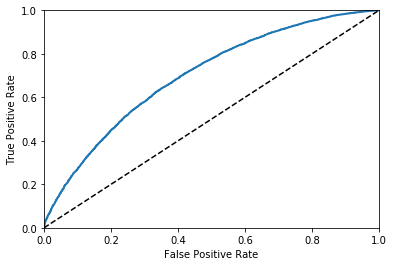

In [88]:
#GRAFICANDO LA CURVA ROC

Y_L_scores= Y_pred_L["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_L_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [89]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L['classes'])

0.64496772611319964

** Clasificador DNN con LLF+HLF.**

In [91]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF+HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[90,90], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_H_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0175c27fd0>, '_model_dir': '/tmp/tmpTb8se5', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpTb8se5/model.ckpt.
INFO:tensorflow:loss = 0.713082, step = 1
INFO:tensorflow:global_step/sec: 516.159
INFO:tensorflow:loss = 0.731159, step = 101 (0.195 sec)
INFO:tensorflow:global_step/sec: 519.97
INFO:tensorflow:loss = 0.657627, step = 201 (0.191 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.578823, step = 7201 (0.186 sec)
INFO:tensorflow:global_step/sec: 557.747
INFO:tensorflow:loss = 0.542288, step = 7301 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.811
INFO:tensorflow:loss = 0.566371, step = 7401 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.657
INFO:tensorflow:loss = 0.562195, step = 7501 (0.181 sec)
INFO:tensorflow:global_step/sec: 455.689
INFO:tensorflow:loss = 0.559041, step = 7601 (0.219 sec)
INFO:tensorflow:global_step/sec: 414.47
INFO:tensorflow:loss = 0.514916, step = 7701 (0.241 sec)
INFO:tensorflow:global_step/sec: 411.809
INFO:tensorflow:loss = 0.581798, step = 7801 (0.243 sec)
INFO:tensorflow:global_step/sec: 445.732
INFO:tensorflow:loss = 0.522181, step = 7901 (0.225 sec)
INFO:tensorflow:global_step/sec: 438.302
INFO:tensorflow:loss = 0.60107, step = 8001 (0.233 sec)
INFO:tensorflow:global_step/sec: 408.844
INFO:tensorflow:loss = 0.670879, step = 8101 (0.239 sec)
INFO:tensorflow:global_step/sec: 356.619
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 516.924
INFO:tensorflow:loss = 0.558695, step = 15601 (0.194 sec)
INFO:tensorflow:global_step/sec: 527.78
INFO:tensorflow:loss = 0.596313, step = 15701 (0.189 sec)
INFO:tensorflow:global_step/sec: 539.986
INFO:tensorflow:loss = 0.545196, step = 15801 (0.186 sec)
INFO:tensorflow:global_step/sec: 536.985
INFO:tensorflow:loss = 0.533702, step = 15901 (0.185 sec)
INFO:tensorflow:global_step/sec: 552.828
INFO:tensorflow:loss = 0.630171, step = 16001 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.616
INFO:tensorflow:loss = 0.539871, step = 16101 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.917
INFO:tensorflow:loss = 0.5437, step = 16201 (0.179 sec)
INFO:tensorflow:global_step/sec: 560.698
INFO:tensorflow:loss = 0.569187, step = 16301 (0.178 sec)
INFO:tensorflow:global_step/sec: 555.809
INFO:tensorflow:loss = 0.551962, step = 16401 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.128
INFO:tensorflow:loss = 0.646151, step = 16501 (0.181 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 546.833
INFO:tensorflow:loss = 0.591181, step = 23901 (0.183 sec)
INFO:tensorflow:global_step/sec: 558.456
INFO:tensorflow:loss = 0.538922, step = 24001 (0.179 sec)
INFO:tensorflow:global_step/sec: 563.904
INFO:tensorflow:loss = 0.598886, step = 24101 (0.178 sec)
INFO:tensorflow:global_step/sec: 563.669
INFO:tensorflow:loss = 0.477808, step = 24201 (0.177 sec)
INFO:tensorflow:global_step/sec: 564.793
INFO:tensorflow:loss = 0.557868, step = 24301 (0.177 sec)
INFO:tensorflow:global_step/sec: 565.761
INFO:tensorflow:loss = 0.585526, step = 24401 (0.177 sec)
INFO:tensorflow:global_step/sec: 362.378
INFO:tensorflow:loss = 0.575127, step = 24501 (0.277 sec)
INFO:tensorflow:global_step/sec: 532.221
INFO:tensorflow:loss = 0.555423, step = 24601 (0.187 sec)
INFO:tensorflow:global_step/sec: 505.145
INFO:tensorflow:loss = 0.627674, step = 24701 (0.199 sec)
INFO:tensorflow:global_step/sec: 403.646
INFO:tensorflow:loss = 0.484266, step = 24801 (0.247 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 564.354
INFO:tensorflow:loss = 0.55607, step = 32201 (0.178 sec)
INFO:tensorflow:global_step/sec: 558.089
INFO:tensorflow:loss = 0.53524, step = 32301 (0.178 sec)
INFO:tensorflow:global_step/sec: 561.68
INFO:tensorflow:loss = 0.522989, step = 32401 (0.178 sec)
INFO:tensorflow:global_step/sec: 565.461
INFO:tensorflow:loss = 0.480833, step = 32501 (0.178 sec)
INFO:tensorflow:global_step/sec: 560.925
INFO:tensorflow:loss = 0.524206, step = 32601 (0.177 sec)
INFO:tensorflow:global_step/sec: 565.656
INFO:tensorflow:loss = 0.497796, step = 32701 (0.177 sec)
INFO:tensorflow:global_step/sec: 565.471
INFO:tensorflow:loss = 0.506035, step = 32801 (0.177 sec)
INFO:tensorflow:global_step/sec: 566.19
INFO:tensorflow:loss = 0.601754, step = 32901 (0.177 sec)
INFO:tensorflow:global_step/sec: 563.628
INFO:tensorflow:loss = 0.446048, step = 33001 (0.177 sec)
INFO:tensorflow:global_step/sec: 560.862
INFO:tensorflow:loss = 0.612313, step = 33101 (0.179 sec)
INFO:tensorflo

SKCompat()

In [92]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L_H = dnn_clf.predict(X_L_H_test)
accuracy_score(Y_test, Y_pred_L_H['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpTb8se5/model.ckpt-40000


0.70194999999999996

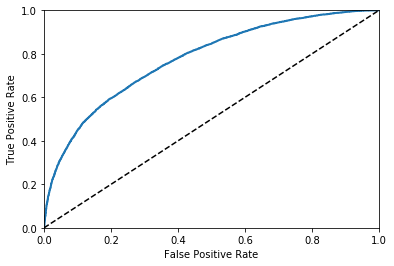

In [93]:
#GRAFICANDO LA CURVA ROC

Y_H_scores= Y_pred_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [94]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L_H['classes'])

0.70053688193260433